## Notebook Setup

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
## standard imports 
import os

## third-party imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.linear_model import LogisticRegression
## local imports

In [7]:
sns.set()

## Load data
    Let's load the iris flower data set using scikit-learn's built in dataset.

In [15]:
data = datasets.load_iris()

In [16]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [20]:
print(data['DESCR']) #prints the description of the data (features)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## What Problem are we trying to solve?
    We will try to predict the target - predict if data is from a specific kind of flower. Target is already data in the dataset. We are trying to use attributes of the flower to predict the species of the flower. Specifically we are trying to use the sepal length and width and petal length and width to predict if an Iris flower is of type Setosa, Versicolor or Virginica. 

## Create a pandas Dataframe from the data
    We could do our full analysis using NumPy arrays but we'll create a pandas DataFrame because it does make some things simplier and is good practice. 

In [25]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [26]:
df["target"] = data["target"]

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Basic descriptive statistics 
Looking at the ranges of each feature 

In [28]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Distributions of features and target
Look at this using a histogram to get the basic distribution of each feature. But what we are mostly interested in the relationship of the data features with the target. 

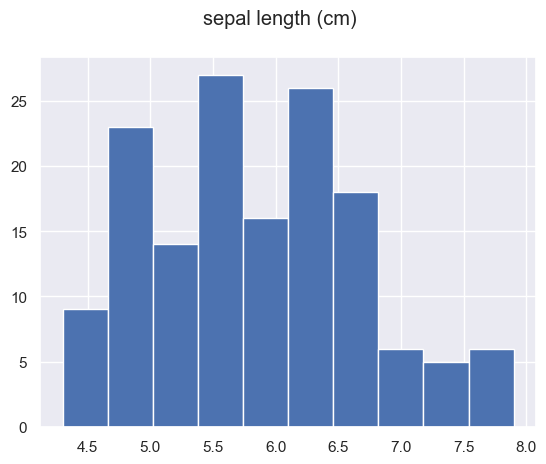

In [32]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

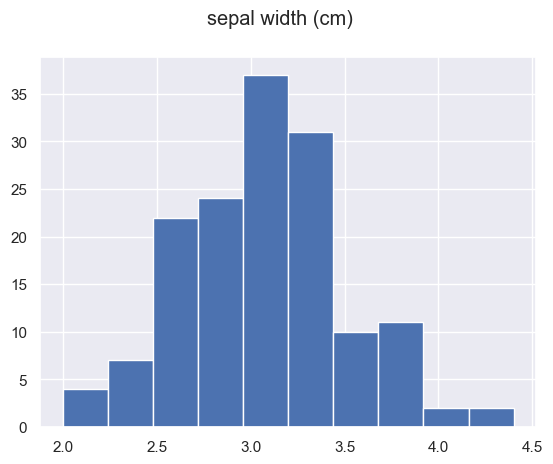

In [33]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

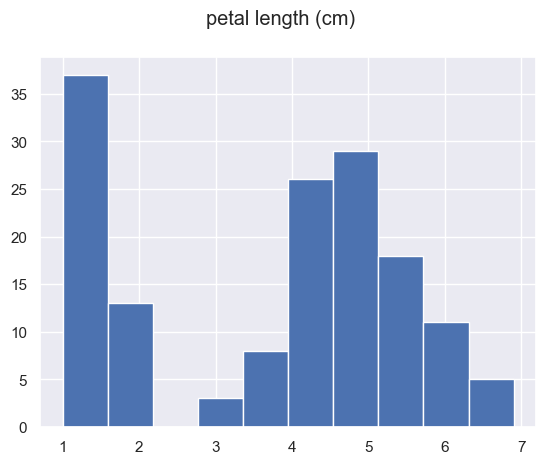

In [34]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

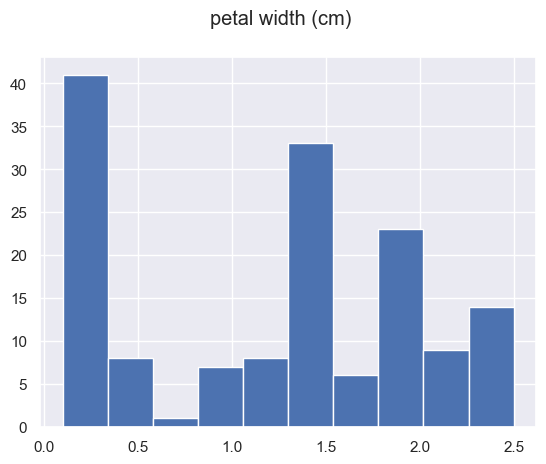

In [35]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

## Relationship of the data features with the target

In [38]:
# create new coloumn with the species name using mapping
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

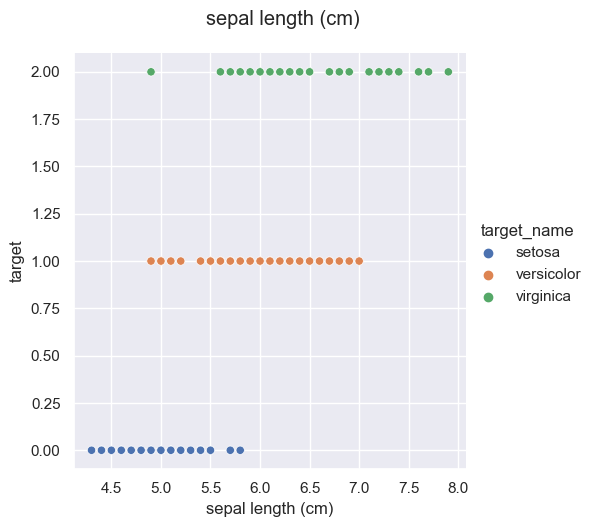

In [42]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df) #relational plot, colored based on target
plt.suptitle(col, y=1.05) #parameter added so title does not overlap with the graph
plt.show() #removes the object title text to just show the plot, can also just assign the suptitle to a throwaway varibale

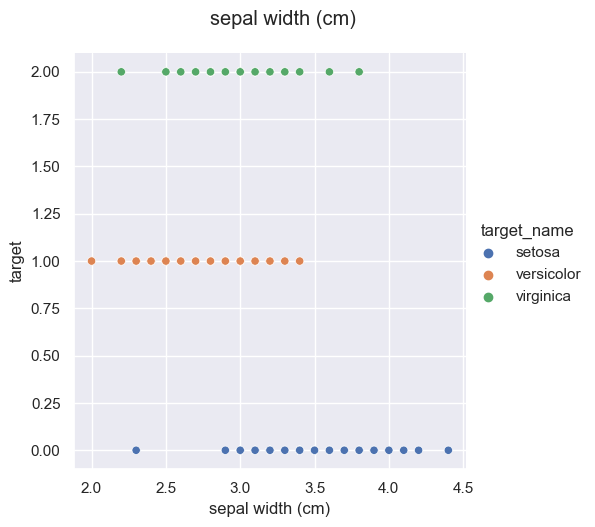

In [44]:
col = "sepal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df) 
plt.suptitle(col, y=1.05) 
plt.show()

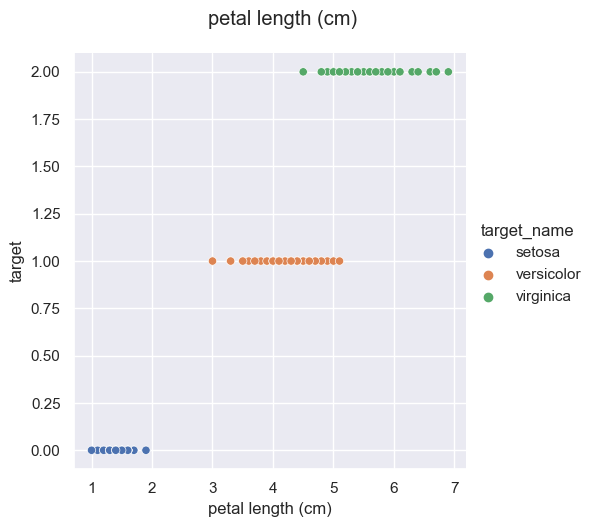

In [45]:
col = "petal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df) #relational plot, colored based on target
plt.suptitle(col, y=1.05) #parameter added so title does not overlap with the graph
plt.show()

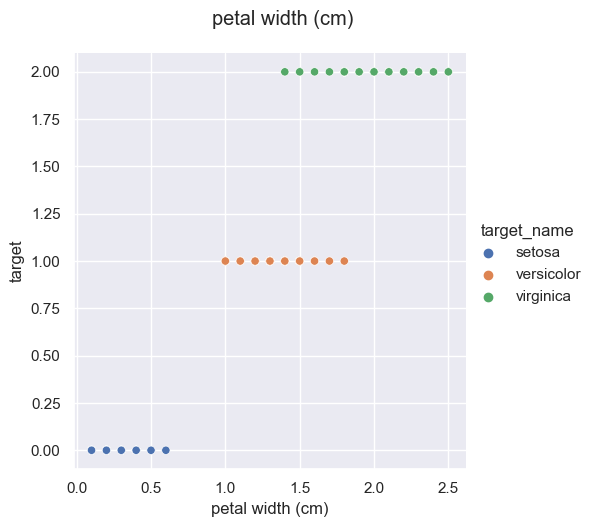

In [46]:
col = "petal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df) #relational plot, colored based on target
plt.suptitle(col, y=1.05) #parameter added so title does not overlap with the graph
plt.show()

### Observation: 
Petal length seems to have the most difference between the three targets. The other sepal l & w and petal width have a lot of overlap. 

## Exploratory Data Analysis (EDA) Pairplots

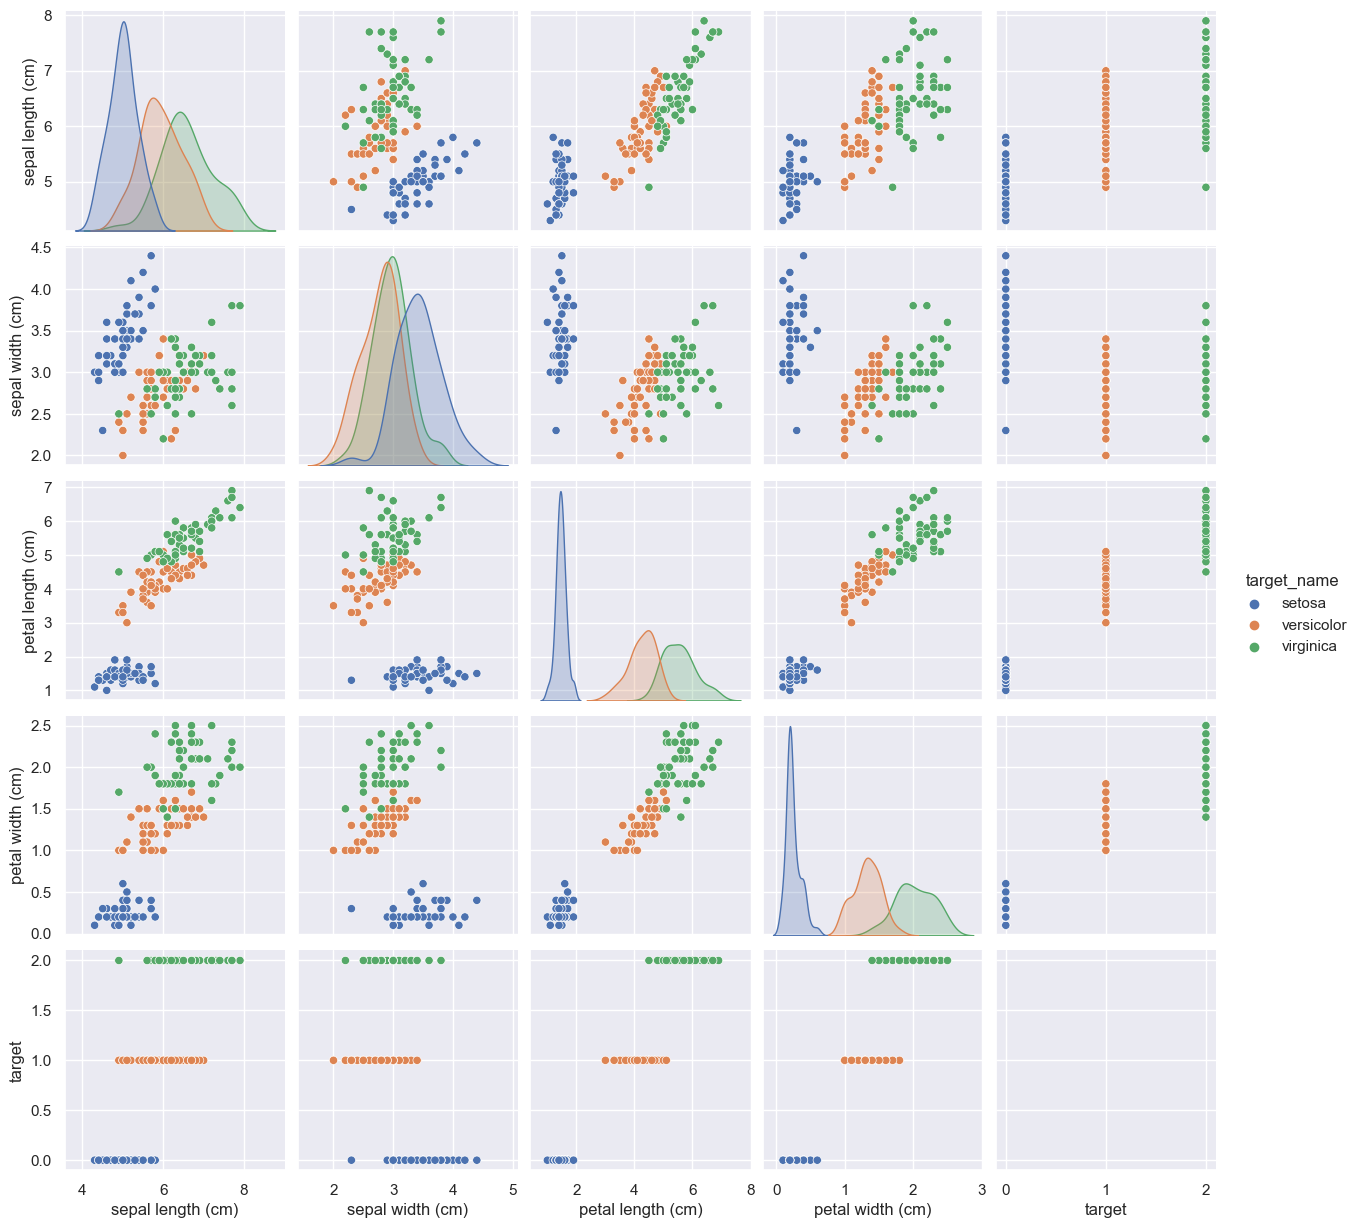

In [48]:
sns.pairplot(df, hue="target_name") # plots every variable in our dataset against every other variable. 

## Train test split 
Setting aside a little piece of our data to evaluate our model, along with cross-validation. 

In [50]:
df_train, df_test = train_test_split(df, test_size=0.25) # split our data so that 75% is to be trained and 25% is left to be tested

In [52]:
df_train.shape
df_test.shape

(38, 6)

In [54]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
82,5.8,2.7,3.9,1.2,1,versicolor
87,6.3,2.3,4.4,1.3,1,versicolor
92,5.8,2.6,4.0,1.2,1,versicolor
109,7.2,3.6,6.1,2.5,2,virginica
71,6.1,2.8,4.0,1.3,1,versicolor


## Prepare data for modeling 
This involves splitting the data back out into plain NumPy arrays. 

In [58]:
X_train = df_train.drop(columns=["target", "target_name"]).values #remove the columns we do not want
y_train = df_train["target"].values

## Modeling 
What is our baseline (the simplest model we can think of?)

In this case, if our baseline model is just randomly guessing the species of flower or guessing a single species for every data point, we would expect to have a model accuracy of 0.33 or 33%, since we have three different classes.

If our model doesn't have a better accuracy than 33% we would be better off guessing. 

### Simple Manual Model 
Let's manually look at our data and decide some cutoff points for classification

Looking at Setosa, we can see that it is always petal lengh < 2.5 cm <- classification rule 
Versicolor and Virginica have more overlap so an estimate is that petal length 2.5 > but < 4.8 is Versicolor and everything else is Virginica. 

In [74]:
def single_feature_prediction(petal_length): 
    """Predicts the Iris Species given the petal length."""
    if petal_length < 2.5: 
        return 0 #target number
    elif petal_length < 4.8: 
        return 1
    else: 
        return 2

In [75]:
X_train[:,2]

array([3.9, 4.4, 4. , 6.1, 4. , 1.5, 1.7, 1.5, 1.6, 3.8, 1.2, 5.9, 4.7,
       1.5, 5.6, 1.3, 5.1, 4.1, 5.2, 1.5, 4. , 5.6, 4.4, 4.8, 5.6, 1.7,
       3.7, 1.4, 1.4, 4.9, 3.3, 1.7, 1.4, 4.7, 4.5, 1.6, 1.1, 5. , 4.8,
       1.4, 5.8, 5. , 1.3, 3. , 5.8, 6. , 1.4, 1.3, 4.3, 1.4, 1.6, 1.5,
       1.4, 1.4, 6. , 4.5, 5.6, 1.5, 4.2, 1.9, 5.7, 5.7, 4.4, 6.1, 4.4,
       1.9, 5.1, 3.9, 4.5, 1.3, 4.6, 1.4, 1.5, 1.2, 4.2, 4. , 4.8, 5.1,
       1.7, 1.4, 5.2, 1.5, 1.6, 4.5, 5.7, 4.6, 5.3, 5.4, 4. , 6.7, 6.7,
       5.9, 4.1, 4.7, 4.2, 3.6, 5. , 5.3, 4.8, 4.9, 5.1, 4.9, 1.5, 4.7,
       1.4, 1.5, 6.6, 1.4, 4.9, 5.4, 3.5, 1.6])

In [76]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in X_train[:,2]]) # gives a list of prediction 

In [78]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train) # true every time our prediction is correct, take the average of 0 and 1s
# output is accuracy

In [80]:
print(f"Manual model accuracy: {manual_model_accuracy * 100:2f}%")

Manual model accuracy: 95.535714%


## Logistic Regression
Probability of one data point belonging to one data classes versus another. The curve of the sigmoid function represents the point where the probablity flips.  

Can use sklearn RandomForestClassifier the same way that you would use LogisticRegression as well


### Using a validation set to evaluate our model

In [90]:
model = LogisticRegression(max_iter=200) # preset is 100 iterations

In [91]:
#Xt stands for "X_train" and Xv stands for "X_validation" cannot test on training data
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.25)

In [92]:
model.fit(Xt, yt)

LogisticRegression(max_iter=200)

In [93]:
y_pred = model.predict(Xv)
model.score(Xv, yv)

0.9642857142857143

## Cross-Validation 
Train on multiple different models who each have a different section of the data as test and as train. 
The average is then taken of the models for a final model with higher accuracy. 

In [97]:
model = LogisticRegression(max_iter=200)
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
np.mean(accuracies)

0.9644268774703558

### Where are we misclassifying points?

In [100]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)
predicted_correctly_mask = y_pred == y_train
not_predicted_correctly = ~predicted_correctly_mask

In [101]:
X_train[not_predicted_correctly]

array([[6.2, 2.8, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.8, 5.1, 1.5]])

In [103]:
df_predictions = df_train.copy()

In [105]:
df_predictions["correct_prediction"] = predicted_correctly_mask
df_predictions["prediction"] = y_pred
df_predictions["prediction_label"] = df_predictions["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [106]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
82,5.8,2.7,3.9,1.2,1,versicolor,True,1,versicolor
87,6.3,2.3,4.4,1.3,1,versicolor,True,1,versicolor
92,5.8,2.6,4.0,1.2,1,versicolor,True,1,versicolor
109,7.2,3.6,6.1,2.5,2,virginica,True,2,virginica
71,6.1,2.8,4.0,1.3,1,versicolor,True,1,versicolor


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

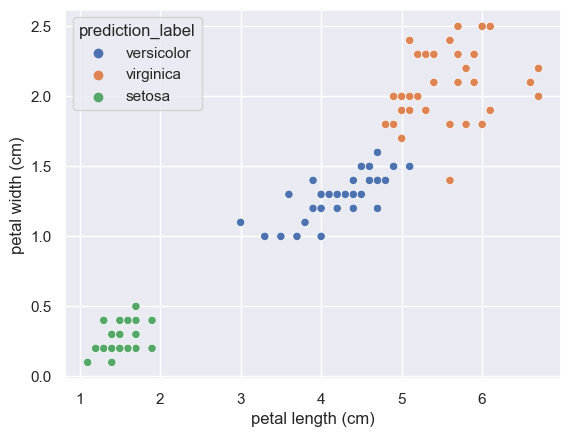

In [107]:
sns.scatterplot(x="petal length (cm)", y= "petal width (cm)", hue="prediction_label", data= df_predictions)

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

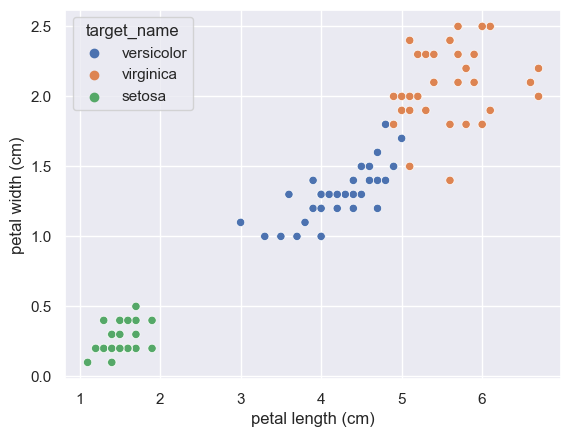

In [108]:
sns.scatterplot(x="petal length (cm)", y= "petal width (cm)", hue="target_name", data= df_predictions)

The three misclassified data points are seen, and we can see that those are very difficult points that are edge cases. 


In [116]:
# create a function to find the points that are incorrect in the model 
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2,2, figsize=(10,10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue = "prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue = "target_name", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue = "correct_prediction", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    plt.show()

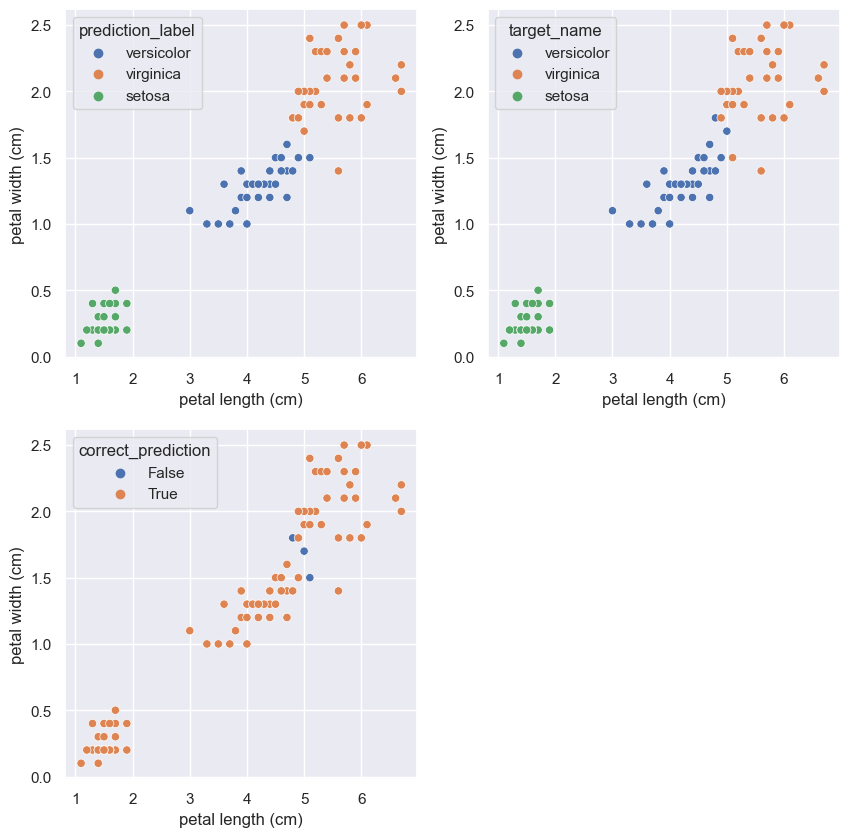

In [117]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

## Model Tuning 

Model tuning is trying to determine the parameters  (hyperparameters) of your model that maximize the model performance

In [130]:
# LogisticRegression model has a "c" parameter for regularization -> for flexibility of the model 
for reg_param in (2.9, 3, 3.5, 3.9, 4, 4.5, 4.9):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param) # Increasing C until 5 increases accuracy
    accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"Accuracy: {np.mean(accuracies) * 100:2f}%")

2.9
Accuracy: 96.442688%
3
Accuracy: 96.442688%
3.5
Accuracy: 96.442688%
3.9
Accuracy: 96.442688%
4
Accuracy: 97.312253%
4.5
Accuracy: 97.312253%
4.9
Accuracy: 97.312253%


In [145]:
model = LogisticRegression(max_iter=200, C=5)

## How well does our model do with the test set?

In [146]:
X_test = df_test.drop(columns=["target", "target_name"]).values
y_test = df_test["target"].values

### Train our final model using our full training Dataset

In [155]:
model.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=200)

In [148]:
y_test_pred = model.predict(X_test)

In [149]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [150]:
print(f"Test set accuracy: {test_set_accuracy * 100:2f}")

Test set accuracy: 94.736842


Not as high as the training data but still pretty good. Now we check what went wrong. 

In [151]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [152]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
79,5.7,2.6,3.5,1.0,1,versicolor,True,1,versicolor
127,6.1,3.0,4.9,1.8,2,virginica,True,2,virginica
119,6.0,2.2,5.0,1.5,2,virginica,True,2,virginica
43,5.0,3.5,1.6,0.6,0,setosa,True,0,setosa
112,6.8,3.0,5.5,2.1,2,virginica,True,2,virginica


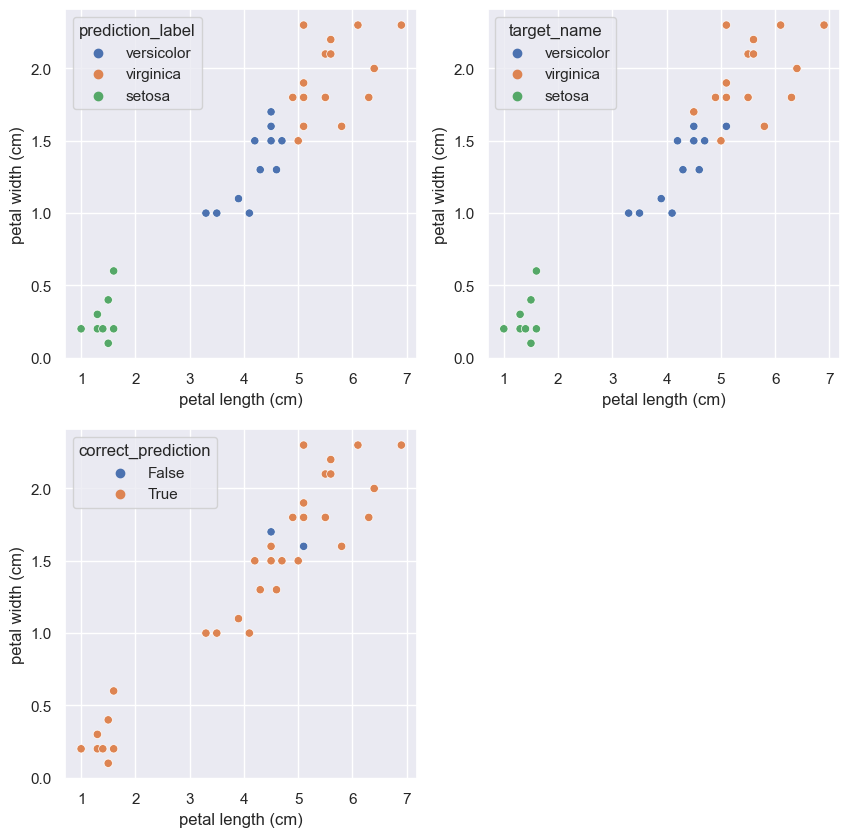

In [154]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature="petal length (cm)", y_axis_feature="petal width (cm)")

## Conclusion
In conclusion we achieved 95% accuracy on the test data set using a Logisitic Regression data model with these model parameters: 
```
    LogisticRegression(C=5, max_iter=200)
```
